In [ ]:
# Train any models on the dataset and check their f1 score
# from sklearn.metrics import f1_score

In [ ]:
# https://github.com/defcom17/NSL_KDD
# https://drive.google.com/drive/folders/1HrTPh0YRSZ4T9DLa_c47lubheKUcPl0r?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

**CIS 2018 INFILTRATION DATASET**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving infiltration_01-03-2018.rar to infiltration_01-03-2018.rar


In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/infiltration_01-03-2018.rar').extractall('/content/')

     |████████████████████████████████| 81kB 3.6MB/s 


**Dataframe**

In [ ]:
df0 = pd.read_csv('/content/infiltration_01-03-2018.csv')

In [ ]:
df0.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.043362,28800000.0,32400000.0,61000000,812396,115000000,28800000.0,32400000.0,61000000,812396,0,0.0,0.0,0,0,0,0,0,0,0,0,0.043362,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,5,0,0,0,-1,-1,0,0,1812348.0,0.0,1812348,1812348,56700000.0,6.010058e+06,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,300.0,0.0,0,0,0.0,0.0,24.530238,0.081767,15300000.0,12800000.0,32600000,3530939,61100000,15300000.0,12800000.0,32600000,3530939,0,0.0,0.0,0,0,0,0,0,0,40,0,0.081767,0.0,300,300,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0,360.0,300.0,0.0,0,0,0,0,0,0,5,1500,0,0,-1,-1,4,8,3530939.0,0.0,3530939,3530939,19200000.0,1.250000e+07,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.048389,31000000.0,42400000.0,61000000,999909,62000000,31000000.0,42400000.0,61000000,999909,0,0.0,0.0,0,0,0,0,0,0,0,0,0.048389,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,999909.0,0.0,999909,999909,61000000.0,0.000000e+00,61000000,61000000,Benign


In [ ]:
df0.notnull().count()

dst_port         331100
protocol         331100
timestamp        331100
flow_duration    331100
tot_fwd_pkts     331100
                  ...  
idle_mean        331100
idle_std         331100
idle_max         331100
idle_min         331100
label            331100
Length: 80, dtype: int64

In [ ]:
df0.columns

Index(['dst_port', 'protocol', 'timestamp', 'flow_duration', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s',
       'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
      

In [ ]:
df0.count()

dst_port         331100
protocol         331100
timestamp        331100
flow_duration    331100
tot_fwd_pkts     331100
                  ...  
idle_mean        331100
idle_std         331100
idle_max         331100
idle_min         331100
label            331100
Length: 80, dtype: int64

In [ ]:
df0['label'] = df0['label'].apply(lambda x: 1 if x == 'Infilteration' else 0)

In [ ]:
df0.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.043362,28800000.0,32400000.0,61000000,812396,115000000,28800000.0,32400000.0,61000000,812396,0,0.0,0.0,0,0,0,0,0,0,0,0,0.043362,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,5,0,0,0,-1,-1,0,0,1812348.0,0.0,1812348,1812348,56700000.0,6.010058e+06,61000000,52500000,0
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,0
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,300.0,0.0,0,0,0.0,0.0,24.530238,0.081767,15300000.0,12800000.0,32600000,3530939,61100000,15300000.0,12800000.0,32600000,3530939,0,0.0,0.0,0,0,0,0,0,0,40,0,0.081767,0.0,300,300,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0,360.0,300.0,0.0,0,0,0,0,0,0,5,1500,0,0,-1,-1,4,8,3530939.0,0.0,3530939,3530939,19200000.0,1.250000e+07,32600000,7999725,0
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,0
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.048389,31000000.0,42400000.0,61000000,999909,62000000,31000000.0,42400000.0,61000000,999909,0,0.0,0.0,0,0,0,0,0,0,0,0,0.048389,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,999909.0,0.0,999909,999909,61000000.0,0.000000e+00,61000000,61000000,0


In [ ]:
df0.isnull().sum()

dst_port         0
protocol         0
timestamp        0
flow_duration    0
tot_fwd_pkts     0
                ..
idle_mean        0
idle_std         0
idle_max         0
idle_min         0
label            0
Length: 80, dtype: int64

In [ ]:
df0 = df0.drop('timestamp', axis = 1)

In [ ]:
df0.head()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,bwd_pkt_len_max,bwd_pkt_len_min,bwd_pkt_len_mean,bwd_pkt_len_std,flow_byts_s,flow_pkts_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_tot,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_tot,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_len,bwd_header_len,fwd_pkts_s,bwd_pkts_s,pkt_len_min,pkt_len_max,pkt_len_mean,pkt_len_std,pkt_len_var,fin_flag_cnt,syn_flag_cnt,rst_flag_cnt,psh_flag_cnt,ack_flag_cnt,urg_flag_cnt,cwe_flag_count,ece_flag_cnt,down_up_ratio,pkt_size_avg,fwd_seg_size_avg,bwd_seg_size_avg,fwd_byts_b_avg,fwd_pkts_b_avg,fwd_blk_rate_avg,bwd_byts_b_avg,bwd_pkts_b_avg,bwd_blk_rate_avg,subflow_fwd_pkts,subflow_fwd_byts,subflow_bwd_pkts,subflow_bwd_byts,init_fwd_win_byts,init_bwd_win_byts,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,115307855,5,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.043362,28800000.0,32400000.0,61000000,812396,115000000,28800000.0,32400000.0,61000000,812396,0,0.0,0.0,0,0,0,0,0,0,0,0,0.043362,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,5,0,0,0,-1,-1,0,0,1812348.0,0.0,1812348,1812348,56700000.0,6.010058e+06,61000000,52500000,0
1,0,0,60997457,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,0
2,67,17,61149019,5,0,1500,0,300,300,300.0,0.0,0,0,0.0,0.0,24.530238,0.081767,15300000.0,12800000.0,32600000,3530939,61100000,15300000.0,12800000.0,32600000,3530939,0,0.0,0.0,0,0,0,0,0,0,40,0,0.081767,0.0,300,300,300.0,0.0,0.0,0,0,0,0,0,0,0,0,0,360.0,300.0,0.0,0,0,0,0,0,0,5,1500,0,0,-1,-1,4,8,3530939.0,0.0,3530939,3530939,19200000.0,1.250000e+07,32600000,7999725,0
3,0,0,60997555,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.032788,61000000.0,0.0,61000000,61000000,61000000,61000000.0,0.0,61000000,61000000,0,0.0,0.0,0,0,0,0,0,0,0,0,0.032788,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,-1,-1,0,0,0.0,0.0,0,0,61000000.0,0.000000e+00,61000000,61000000,0
4,0,0,61997503,3,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000,0.048389,31000000.0,42400000.0,61000000,999909,62000000,31000000.0,42400000.0,61000000,999909,0,0.0,0.0,0,0,0,0,0,0,0,0,0.048389,0.0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,0,0,-1,-1,0,0,999909.0,0.0,999909,999909,61000000.0,0.000000e+00,61000000,61000000,0


In [ ]:
df0.isnull().sum()

dst_port         0
protocol         0
flow_duration    0
tot_fwd_pkts     0
tot_bwd_pkts     0
                ..
idle_mean        0
idle_std         0
idle_max         0
idle_min         0
label            0
Length: 79, dtype: int64

In [ ]:
def _assert_all_finite(df0):
    df0 = np.asanyarray(df0)
    if (df0.dtype.char in np.typecodes['AllFloat'] and not np.isfinite(df0.sum())
            and not np.isfinite(df0).all()):
        raise ValueError("Input contains NaN, infinity"
                         " or a value too large for %r." % df0.dtype)

In [ ]:
df0.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df0.fillna(999, inplace=True)

In [ ]:
np.any(np.isnan(df0))

False

In [ ]:
np.all(np.isfinite(df0))

True

In [ ]:
X = df0.drop('label', axis = 1)
y = df0['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.958298209946943
Test accuracy 0.7079432195711266


In [ ]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.7735003628790509
test score... 0.7737660507216533


In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 48kB/s 


In [ ]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[17:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[17:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:43:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[17:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


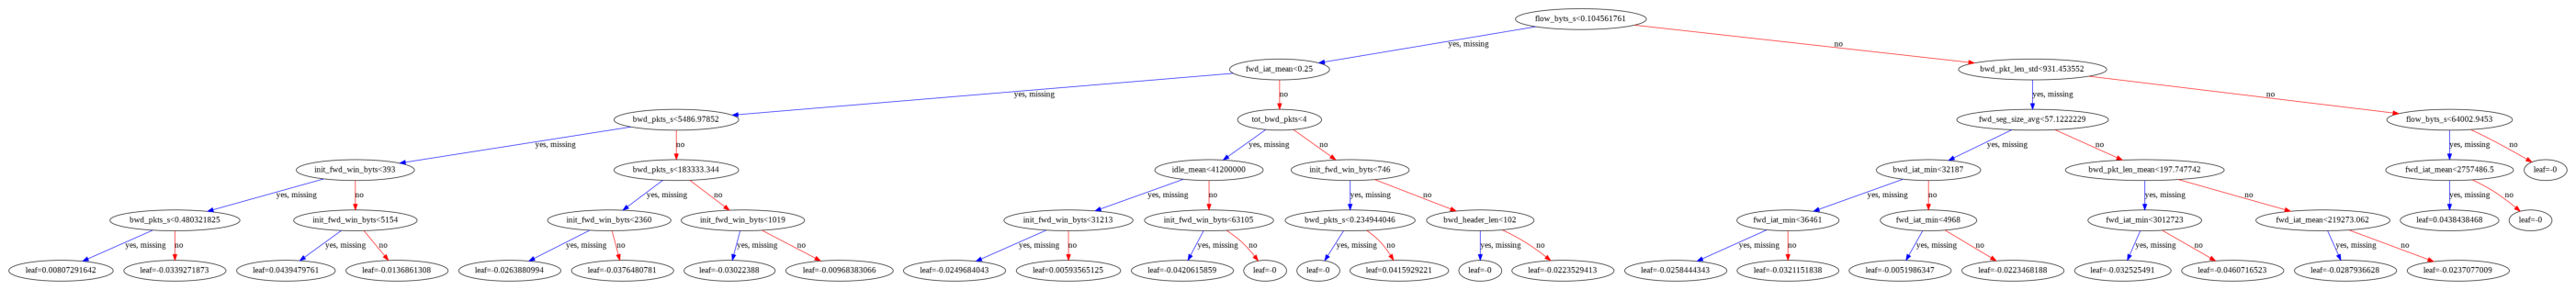

In [ ]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

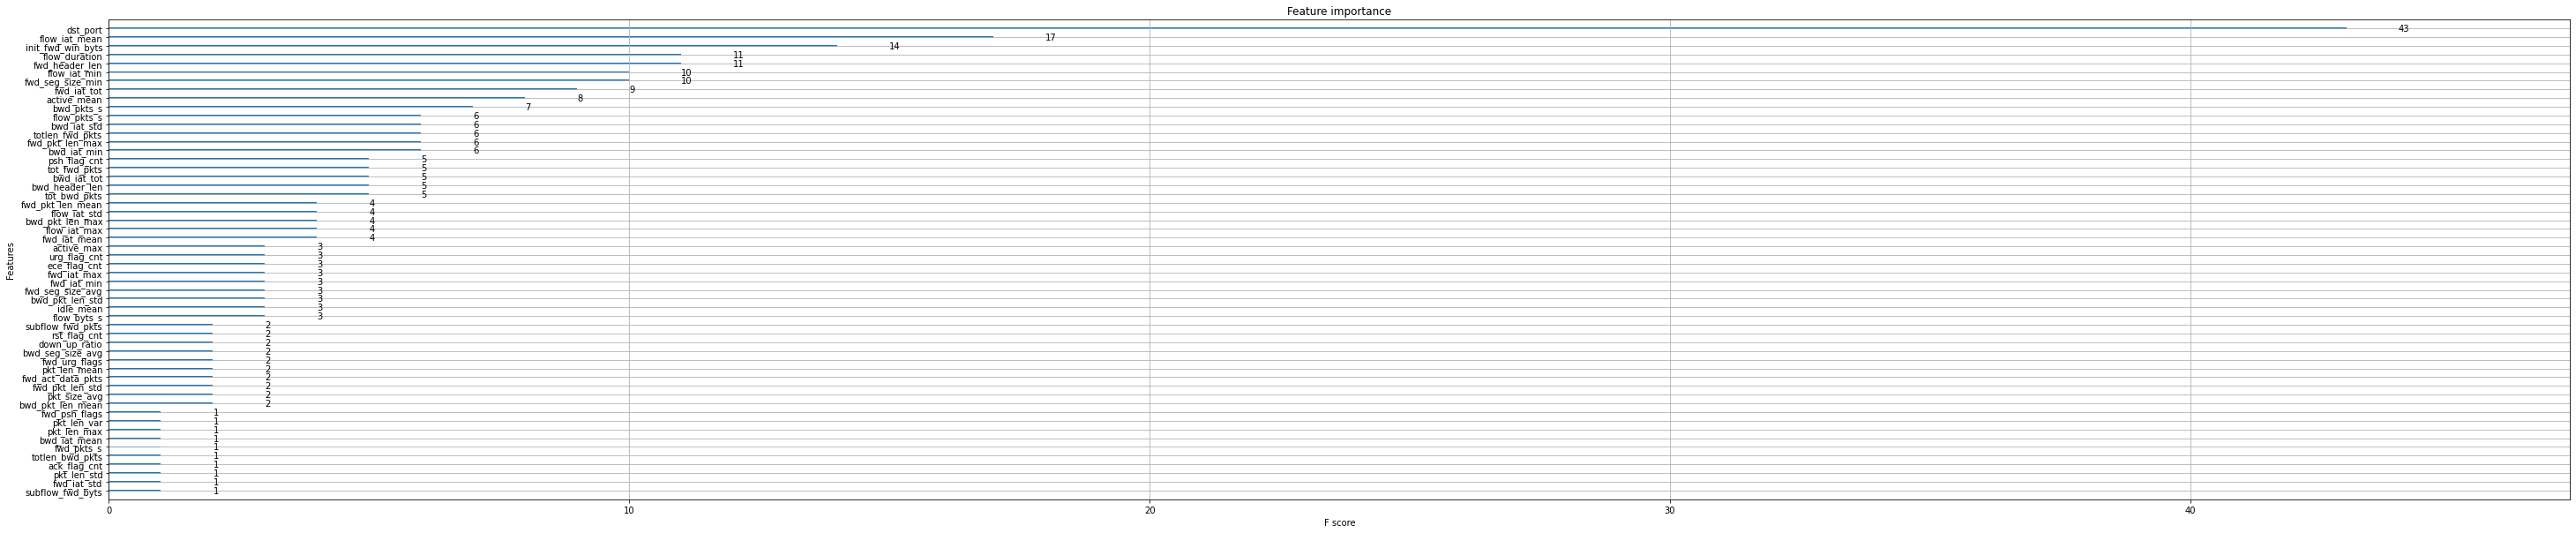

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
from sklearn.metrics import accuracy_score, f1_score
f1 = f1_score(y_test, y_pred)
f1

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


True Positive 522
True Negative 78376
False Positive 216
False Negative 30149


0.03323888057563119

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf,X, y, cv=10, scoring=["accuracy", "precision", "recall"])
cv_results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'fit_time': array([9.02643108, 8.90789461, 8.93844056, 9.00064921, 8.98233247,
        9.08501816, 9.6809833 , 9.26015043, 8.83007097, 9.01311493]),
 'score_time': array([0.03962564, 0.03781486, 0.03842044, 0.04103017, 0.03791857,
        0.03830886, 0.03847837, 0.0388968 , 0.03935862, 0.03857279]),
 'test_accuracy': array([0.71658109, 0.7231048 , 0.72280278, 0.38435518, 0.72144367,
        0.72204772, 0.72352764, 0.72530957, 0.72491694, 0.72207792]),
 'test_precision': array([0.19047619, 0.84158416, 0.75806452, 0.07128483, 0.74850299,
        0.69731801, 0.86538462, 0.88970588, 0.81388013, 0.72925764]),
 'test_recall': array([0.00257898, 0.01826778, 0.02020202, 0.09896841, 0.01343219,
        0.01955727, 0.01934236, 0.02600193, 0.02772107, 0.01794348])}

In [ ]:
from sklearn.model_selection import GridSearchCV
def gridfunc(classifier, parameter, X_train, y_train):
        
    clf = classifier
    np.random.seed(0)
    parameters = parameter
    acc_scorer = make_scorer(accuracy_score)
    
    # Run the grid search
    grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer, return_train_score=True)
    grid_obj = grid_obj.fit(X_train, y_train) 
    
    return grid_obj

In [ ]:
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_  #A dictionary with keys as column title and values as columns
    mean_test_scores = grid_obj.cv_results_['mean_test_score'] #Adding 'mean_test_score' as a key
    mean_train_scores = grid_obj.cv_results_['mean_train_score'] #Adding 'mean_train_score' as a key
    
    plt.figure(figsize=(10,6))
    
    # the below lines just fill up the column using the various parameter values we want to try
    all_vals = list(grid_obj.param_grid.values())
    param_values =[str(x) for x in all_vals[0]]
    
    # The below line creates values for ticks on x axis. If there are 2 parameter values to be tried, it'll create 2 ticks
    x = np.arange(1, len(param_values)+1)
     
    plt.plot(x,mean_train_scores, c='r', label='Train set') #Plotting the mean_train_scores in red
    
    plt.xticks(x,param_values)
    
    plt.plot(x,mean_test_scores,c='g', label='Test set') #Plotting the mean_test_scores in red
    plt.xlabel(list(grid_obj.param_grid.keys())[0]) #Label of the column will be the hyperparameter
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [ ]:
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6] 
             }

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,criterion='entropy', max_features='sqrt',
                       random_state=123)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

Feature Importances :  [0.03652655 0.         0.00424114 0.         0.00327618 0.02043341
 0.03155415 0.01327682 0.00613666 0.00387871 0.00385317 0.01961014
 0.00384956 0.0149768  0.00632326 0.01222297 0.02229332 0.00715224
 0.01557721 0.00577097 0.10706205 0.         0.00239859 0.0072735
 0.00449227 0.01038082 0.00690629 0.00138916 0.         0.
 0.01491267 0.         0.         0.         0.         0.0731589
 0.00201654 0.079158   0.01000317 0.00475916 0.02825883 0.03457658
 0.00169219 0.         0.         0.         0.01964546 0.00901516
 0.02750867 0.00435573 0.         0.01400243 0.0098044  0.02656896
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03230056 0.01643473 0.00633048 0.18132699 0.01367604 0.
 0.00061406 0.00636156 0.00352474 0.00316992 0.0035387  0.00242941]


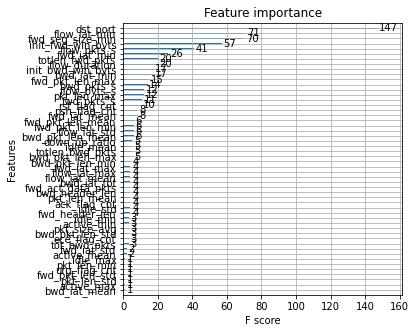

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()

In [ ]:
y_pred = xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.7841812873525347
XGB Baseline Model F1 Score: 0.39904176966793237


In [ ]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
  # select features using threshold
  selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
  select_X_train = selection.transform(X_train)
  # train model
  selection_model = XGBClassifier()
  selection_model.fit(select_X_train, y_train)
  # eval model
  select_X_test = selection.transform(X_test)
  predictions = selection_model.predict(select_X_test)
  xgb_accuracy = accuracy_score(y_test, predictions)
  xgb_fscore = f1_score(y_test , predictions)
  print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, F1 Score:%.3f " % (thresh, select_X_train.shape[1], xgb_accuracy*100.0, xgb_fscore))

Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy: 78.42%, F1 Score:0.399 
Thresh=0.000, n=78, Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2528      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


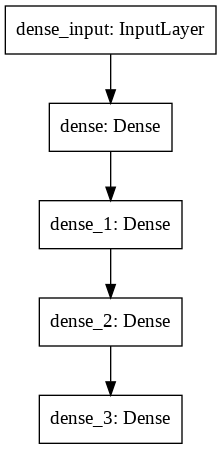

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

**MODEL**

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
21191/21191 [==============================] - 65s 3ms/step - loss: 2466.6492 - accuracy: 0.7152 - val_loss: 0.5996 - val_accuracy: 0.7130
Epoch 2/50
21191/21191 [==============================] - 67s 3ms/step - loss: 0.5942 - accuracy: 0.7203 - val_loss: 0.5995 - val_accuracy: 0.7130
Epoch 3/50
21191/21191 [==============================] - 63s 3ms/step - loss: 0.5927 - accuracy: 0.7203 - val_loss: 0.5995 - val_accuracy: 0.7130
Epoch 4/50
21191/21191 [==============================] - 65s 3ms/step - loss: 0.5927 - accuracy: 0.7203 - val_loss: 0.5996 - val_accuracy: 0.7130
Epoch 5/50
21191/21191 [==============================] - 65s 3ms/step - loss: 0.5927 - accuracy: 0.7203 - val_loss: 0.5997 - val_accuracy: 0.7130
Epoch 6/50
21191/21191 [==============================] - 63s 3ms/step - loss: 0.5927 - accuracy: 0.7203 - val_loss: 0.5998 - val_accuracy: 0.7130
Epoch 7/50
21191/21191 [==============================] - 65s 3ms/step - loss: 0.5927 - accuracy: 0.7203 - val_loss

In [ ]:
model.evaluate(X_test, y_test)

2070/2070 [==============================] - 3s 2ms/step - loss: 0.5936 - accuracy: 0.7194


[0.5935541987419128, 0.7193748354911804]

AutoML GCloud Deployment

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.7MB/s 
     |████████████████████████████████| 163kB 13.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11956 sha256=c87f45994255af3b7ad5855e8c9855afabd472f3ffe16a010ae57316339b592b
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
from tpot import TPOTRegressor

In [ ]:
print("Training Features Shape:", df0.shape)

Training Features Shape: (331100, 79)


In [ ]:
training_features = np.array(X_train)
testing_features = np.array(X_test)

In [ ]:
tpot = TPOTRegressor(scoring = 'neg_mean_absolute_error', 
                    max_time_mins = 480, 
                    n_jobs = -1,
                    verbosity = 2,
                    cv = 5)

In [ ]:
training_targets = np.array(y_train)
testing_targets = np.array(y_test)

In [ ]:
tpot.fit(training_features, training_targets)

RuntimeError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
from tpot.builtins import StackingEstimator

imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Final pipeline from TPOT
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    GradientBoostingRegressor(alpha=0.95, learning_rate=0.1, loss="lad", 
                              max_depth=7, max_features=0.75, 
                              min_samples_leaf=3, min_samples_split=18, 
                              n_estimators=100, subsample=0.60)
)

In [ ]:
# Fit on the training data
exported_pipeline.fit(training_features, training_targets)
# Make predictions on the testing data
predictions = exported_pipeline.predict(testing_features)

print('Mean Absolute Error = %0.4f' % np.mean(abs(predictions - testing_targets)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 9 iterations, i.e. alpha=5.865e-05, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 11 iterations, i.e. alpha=4.779e-05, with an active set of 9 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_least_angle.py:582: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=2.843e-05, with an active set of 12 regressors, and the smallest cholesky pivot eleme

Mean Absolute Error = 0.2171


In [ ]:
predictions.shape

(109263,)